In [48]:
import numpy as np
from scipy import integrate
from scipy.integrate import dblquad
from matplotlib import pyplot as plt
import time

In [49]:
class RefFunc2d:
    '''
        triangle reference basis function\n
        only support poly = 1 or 2
    '''
    def __init__(self, poly : int):
        self.poly = poly 

    def __call__(self, input, i, x_der=0, y_der=0):
        return self.der(input, i, x_der, y_der)
        
    def der(self,input, i, x_der, y_der):
        input = np.array(input)
        if self.poly == 1:
            if x_der == 0 and y_der == 0:
                return self._poly_1(input, i)
            if x_der == 1 and y_der == 0:
                return self._poly_1_dx(input, i)
            if x_der == 0 and y_der == 1:
                return self._poly_1_dy(input, i)
            return 0.0
        if self.poly == 2:
            if x_der == 0 and y_der == 0:
                return self._poly_2(input, i)
            if x_der == 1 and y_der == 0:
                return self._poly_2_dx(input, i)
            if x_der == 0 and y_der == 1:
                return self._poly_2_dy(input, i)
            if x_der == 1 and y_der == 1:
                return self._poly_2_dxdy(input, i)
            if x_der == 2 and y_der == 0:
                return self._poly_2_dxdx(input, i)
            if x_der == 0 and y_der == 2:
                return self._poly_2_dydy(input, i)
            return 0.0


    def _poly_1(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        x, y = input
        if i == 0:
            return -x -y + 1.0
        if i == 1:
            return x
        if i == 2:
            return y    
    def _poly_1_dx(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        if i == 0:
            return -1.0
        if i == 1:
            return 1.0
        if i == 2:
            return 0.0
    def _poly_1_dy(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        if i == 0:
            return -1.0
        if i == 1:
            return 0.0
        if i == 2:
            return 1.0
    
    def _poly_2(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        x, y = input
        if i == 0:
            return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 2*x**2 - x
        if i == 2:
            return 2*y**2 - y
        if i == 3:
            return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 4*x*y
        if i == 5:
            return -4*y**2 - 4*x*y + 4*y 
    def _poly_2_dx(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        x, y = input
        if i == 0:
            return 4*x + 4*y - 3.0
            #return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 4*x - 1.0
            #return 2*x**2 - x
        if i == 2:
            return 0.0
            #return 2*y**2 - y
        if i == 3:
            return -8*x -4*y + 4.0
            #return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 4*y
            #return 4*x*y
        if i == 5:
            return -4*y 
            #return -4*y**2 - 4*x*y + 4*y 
    def _poly_2_dy(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        x, y = input
        if i == 0:
            return 4*y + 4*x - 3.0
            #return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 0.0
            #return 2*x**2 - x
        if i == 2:
            return 4*y - 1.0
            #return 2*y**2 - y
        if i == 3:
            return -4*x
            #return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 4*x
            #return 4*x*y
        if i == 5:
            return -8*y - 4*x + 4.0 
            #return -4*y**2 - 4*x*y + 4*y 

    def _poly_2_dxdy(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        if i == 0:
            return 4.0
            #return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 0.0
            #return 2*x**2 - x
        if i == 2:
            return 0.0
            #return 2*y**2 - y
        if i == 3:
            return -4.0
            #return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 4.0
            #return 4*x*y
        if i == 5:
            return -4.0 
            #return -4*y**2 - 4*x*y + 4*y 
    def _poly_2_dxdx(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        if i == 0:
            return 4.0
            #return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 4.0
            #return 2*x**2 - x
        if i == 2:
            return 0.0
            #return 2*y**2 - y
        if i == 3:
            return -8.0
            #return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 0.0
            #return 4*x*y
        if i == 5:
            return 0.0
            #return -4*y**2 - 4*x*y + 4*y 
    def _poly_2_dydy(self, input, i):
        #if np.any(input < 0.0) or np.any(input > 1.0):
        #    return 0.0
        if i == 0:
            return 4.0
            #return  2*(x**2 + y**2) + 4*x*y - 3*(x + y) + 1.0
        if i == 1:
            return 0.0
            #return 2*x**2 - x
        if i == 2:
            return 4.0
            #return 2*y**2 - y
        if i == 3:
            return 0.0
            #return -4*x**2 - 4*x*y + 4*x
        if i == 4:
            return 0.0
            #return 4*x*y
        if i == 5:
            return -8.0
            #return -4*y**2 - 4*x*y + 4*y 

In [86]:
class LocFunc2d:
    def __init__(self, ref_func: RefFunc2d):
        self.ref_func = ref_func

    def __call__(self, input, i, tri_coord):
        input_hat, _ = self.to_hat(input, tri_coord)
        return self.ref_func(input_hat, i)

    def jacobi(self, X, Y):
        self.J = (X[1] - X[0])*(Y[2] - Y[0]) - (X[2] - X[0])*(Y[1] - Y[0])
        return self.J

    def to_hat(self, input, tri_coord):
        x, y = input
        X, Y = tri_coord
        J = self.jacobi(X, Y)
        x_hat = ((Y[2] - Y[0])*(x - X[0]) - (X[2] - X[0])*(y - Y[0])) / J
        y_hat = (-(Y[1] - Y[0])*(x - X[0]) + (X[1] - X[0])*(y - Y[0])) / J
        return x_hat, y_hat
    
    def hat_to(self, input_hat, tri_coord):
        x_hat, y_hat = input_hat
        X, Y = tri_coord
        x = (X[1]-X[0])*x_hat + (X[2]-X[0])*y_hat + X[0]
        y = (Y[1]-Y[0])*x_hat + (Y[2]-Y[0])*y_hat + Y[0]
        return x, y

    def der(self, input_hat, i, tri_coord, x_der, y_der):
        X, Y = tri_coord
        
        if x_der == 1 and y_der == 0:
            return (
            (Y[2]-Y[0]) * self.ref_func.der(input_hat, i, x_der=1, y_der=0)
            +
            (Y[0]-Y[1]) * self.ref_func.der(input_hat, i, x_der=0, y_der=1)
            ) / self.J
        if x_der == 0 and y_der == 1:
            return (
            (X[0]-X[2]) * self.ref_func.der(input_hat, i, x_der=1, y_der=0)
                +
            (X[1]-X[0]) * self.ref_func.der(input_hat, i, x_der=0, y_der=1)
            ) / self.J
        if x_der == 1 and y_der == 1:
            return (
            (X[0]-X[2])*(Y[2]-Y[0])*self.ref_func.der(input_hat,i,2,0)
                +
            (X[0]-X[2])*(Y[0]-Y[1])*self.ref_func.der(input_hat,i,1,1)
                +
            (X[1]-X[0])*(Y[2]-Y[0])*self.ref_func.der(input_hat,i,1,1)
                +
            (X[1]-X[0])*(Y[0]-Y[1])*self.ref_func.der(input_hat,i,0,2)
            ) / (self.J**2)
        if x_der == 2 and y_der == 0:
            return (
            (Y[2]-Y[0])**2 * self.ref_func.der(input_hat,i,2,0)
                +
            2.0*(Y[2]-Y[0])*(Y[0]-Y[1]) * self.ref_func.der(input_hat,i,1,1)
                +
            (Y[0]-Y[1])**2 * self.ref_func.der(input_hat,i,0,2)
            ) / (self.J ** 2)
        if x_der == 0 and y_der == 2:
            return (
            (X[0]-X[2])**2 * self.ref_func.der(input_hat,i,2,0)
                +
            2*(X[0]-X[2])*(X[1]-X[0]) * self.ref_func.der(input_hat,i,1,1)
                +
            (X[1]-X[0])**2 * self.ref_func.der(input_hat,i,0,2)
            ) / (self.J ** 2)
        return 0.0
    


In [87]:
class Mesh2d:
    def __init__(self, interval, Num, poly, bc_type):
        self.interval = interval
        self.Num = Num
        self.poly = poly
        self.bc_type = bc_type
        self.P, self.T = self._gen_P_T()
        self.Pb, self.Tb = self._gen_Pb_Tb()
        self.Be = self._gen_Be()
        self.Bn = self._gen_Bn()

    def get_info_matrices(self):
        return self.P, self.T, self.Pb, self.Tb, self.Be ,self.Bn
    
    def _gen_P_T(self):
        lb, ub = self.interval[:,0], self.interval[:,1]
        h = (ub - lb) / self.Num

        Nx, Ny = np.squeeze(self.Num)
        P = np.zeros(shape=(2, (Nx+1)*(Ny+1)))
        for i in range(Nx + 1):
            for j in range(Ny + 1):
                P[0, i * (Ny + 1) + j] = (lb[0] + i * h[0])
                P[1, i * (Ny + 1) + j] = (lb[1] + j * h[1])

        T = np.zeros(shape = (3, 2 * Nx * Ny), dtype=int)
        ref_T = np.array([[0,Ny+1,0+1],[0+1,Ny+1,Ny+1+1]],dtype=int).T
        for n in range(Nx * 2*Ny):
            i = n // (2 * Ny)
            j = n % (2 * Ny)
            j1, j2 = j // 2, j % 2
            T[:,n] = ref_T[:,j2] +  (Ny + 1) * i + j1

        return P, T
    def _gen_Pb_Tb(self):
        if self.poly == 1:
            return self._gen_P_T()
        # self.poly = 2
        Nx, Ny = np.squeeze(self.Num)
        lb, ub = self.interval[:,0], self.interval[:,1]
        h = (ub - lb) / (2 * self.Num)

        Pb = np.zeros(shape=(2, (2*Nx+1)*(2*Ny+1)))
        for i in range(2*Nx + 1):
            for j in range(2*Ny + 1):
                Pb[0, i * (2*Ny + 1) + j] = (lb[0] + i * h[0])
                Pb[1, i * (2*Ny + 1) + j] = (lb[1] + j * h[1])

        Tb = np.zeros(shape=(6, 2*Nx*Ny), dtype=int)
        ref_Tb = np.array([[0, 2*(2*Ny+1), 0+2, 2*Ny+1, 2*Ny+1+1, 1],
        [2, 2*(2*Ny+1), 2*(2*Ny+1)+2, 2*Ny+1+1, 2*(2*Ny+1)+1, 2*Ny+1+2]],
        dtype=int).T
        for n in range(2 * Nx * Ny):
            i = n // (2 * Ny)
            j = n % (2 * Ny)
            j1, j2 = j // 2, j % 2
            Tb[:,n] = ref_Tb[:,j2] + 2*(2*Ny+1) * i + 2 * j1
        return Pb, Tb
    def _gen_Be(self):
        #boundary edge info-matrix
        Nx, Ny = np.squeeze(self.Num)
        Be = np.zeros(shape=(4, 2*(Nx+Ny)),dtype=int)
        
        st_points = [[0, 0], [Nx - 1, 1], [Nx - 1, 2 * Ny - 1], [0, 2 * Ny - 2]]
        directions = [[1, 0], [0, 2], [-1, 0], [0, -2]]
        
        n = 0
        for idx in range(4):
            st_point = st_points[idx]
            direction = directions[idx]
            for k in range(self.Num[int(idx % 2)]):
                i = st_point[0] + k * direction[0]
                j = st_point[1] + k * direction[1]
                element_id = i * 2 * Ny + j
                #print(element_id)
                Be[0, n] = self.bc_type[idx]
                Be[1, n] = element_id
                if idx == 0:
                    Be[2:, n] = self.T[0:2, element_id]
                elif idx == 1:
                    Be[2:, n] = self.T[1:3, element_id]
                elif idx == 2 or idx == 3:
                    Be[2, n] = self.T[2, element_id]
                    Be[3, n] = self.T[0, element_id]
                n += 1
        return Be
    def _gen_Bn(self):
        #boundary node info-matrix
        Nx, Ny = np.squeeze(self.Num)
        if self.poly == 1:
            Bn = np.zeros(shape=(2,2*(Nx + Ny)), dtype=int)
            R = [0, Nx*(Ny+1), Nx*(Ny+1) + Ny, Ny, 0]
            S = [Ny+1, 1, -(Ny+1), -1]
            D = [Nx, Ny, Nx, Ny]
            
        elif self.poly == 2:
            Bn = np.zeros(shape=(2, 4*(Nx + Ny)), dtype=int)
            R = [0, 2*Nx*(2*Ny+1), 2*Nx*(2*Ny+1) + 2*Ny, 2*Ny, 0]
            S = [2*Ny+1, 1, -(2*Ny+1), -1]
            D = [2*Nx, 2*Ny, 2*Nx, 2*Ny]
            
        start = end = 0
        for i in range(4):
            start = end
            end = end + D[i]
            Bn[0, start:end] = self.bc_type[i]
            Bn[1, start:end] = np.arange(R[i],R[i+1],S[i])        

        return Bn 

In [88]:
'''定义区间 、 分割个数 、边界类型'''
interval = np.array([[-1.0, 1.0], [-1.0, 1.0]])# [[x_min, x_max],[y_min, y_max]]
num = np.array([2, 2],dtype=int)# [x_num, y_num]
bc_type = [-1, -1, -1, -1]#dirichlet

'''剖分区域、参考函数 '''
poly = 1
ref_func = RefFunc2d(poly)
loc_func = LocFunc2d(ref_func)
mesh = Mesh2d(interval, num, poly, bc_type)

In [89]:
P, T, Pb, Tb, Be, Bn = mesh.get_info_matrices()

In [90]:
'''计算刚度矩阵A'''
def c_func(x, y):
    return 1.0
def A_func(x_hat, y_hat, alpha, beta, tri_coord,x1_der,y1_der,x2_der,y2_der):
    input_hat = (x_hat, y_hat)
    x, y = loc_func.hat_to(input_hat, tri_coord) 

    return (
    c_func(x, y) 
    * loc_func.der(input_hat, alpha, tri_coord, x1_der, y1_der) 
    * loc_func.der(input_hat, beta, tri_coord, x2_der, y2_der)
    )

N = T.shape[1]
Nb = Pb.shape[1]

A = np.zeros(shape=(Nb, Nb))
for n in range(0, N):
    X = P[0, T[:, n]]
    Y = P[1, T[:, n]]
    J = loc_func.jacobi(X, Y)
    tri_coord = (X, Y)
    
    for alpha in range(0, len(Tb)):
        for beta in range(0, len(Tb)):

            val1, err1 = dblquad(func=A_func, a=0.0, b=1.0, gfun=0.0, hfun=lambda x : -x + 1.0,
            args=(alpha, beta, tri_coord,1,0,1,0))
            val2, err2 = dblquad(func=A_func, a=0.0, b=1.0, gfun=0.0, hfun=lambda x : -x + 1.0, 
            args=(alpha, beta, tri_coord,0,1,0,1))
            val = (val1 + val2) * np.abs(J)
            A[Tb[beta, n], Tb[alpha, n]] += val

In [91]:
'''计算b'''
def f_func(x, y):
    return (
    -y * (1.0-y) * (1.0 - x - 0.5*(x**2) ) * np.exp(x + y)
    -x * (1.0-x/2.0) * (-3.0*y - y**2) * np.exp(x + y)
    )
def b_func(x_hat, y_hat, beta, tri_coord):
    input_hat = (x_hat, y_hat)
    x, y = loc_func.hat_to(input_hat, tri_coord) 
    return f_func(x, y) * ref_func(input_hat, beta)

b = np.zeros(shape=(Nb, 1))
for n in range(0, N):
    X = P[0, T[:, n]]
    Y = P[1, T[:, n]]
    J = loc_func.jacobi(X, Y)
    tri_coord = (X, Y)

    for beta in range(0, len(Tb)):
        #print(beta)
        val, err = dblquad(
            func=b_func, 
            a=0.0, b=1.0, gfun=0.0, hfun=lambda x : -x+1.0,
            args=(beta, tri_coord)
        ) 
        
        b[Tb[beta,n], 0] += val * np.abs(J)

In [92]:
'''处理Dirichlet边界'''
def bc_func(x, y):
    if np.isclose(x, -1.0):
        return -1.5*y*(1.0 - y)*np.exp(-1.0 + y)
    if np.isclose(x, 1.0):
        return 0.5*y*(1.0 - y)*np.exp(1.0 + y)
    if np.isclose(y, -1.0):
        return -2.0*x*(1.0 - x/2)*np.exp(x - 1.0)
    if np.isclose(y, 1.0):
        return 0.0
for k in range(0, Bn.shape[1]):
    i = Bn[1, k]
    A[i, :] = 0.0
    A[i, i] = 1.0
    #print(Pb[:,i])
    b[i, 0] = bc_func(*Pb[:, i])



In [93]:
'''solve Au = b'''
u = np.linalg.solve(A, b)

In [94]:
def u_solution(x, y):
    return x*y*(1.0 - x/2.0)*(1.0 - y)*np.exp(x + y)
u_real = np.array([u_solution(*Pb[:,i]) for i in range(0, Pb.shape[1])])
print(np.max(np.abs(u.squeeze() - u_real)))


0.06823180234919594


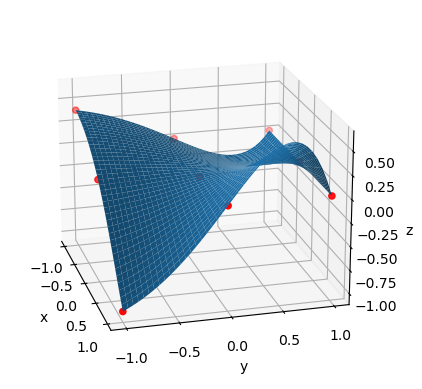

In [84]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.arange(-1.0,1.05,0.05), np.arange(-1.0,1.05,0.05))
ax.plot_surface(X, Y, u_solution(X, Y))
ax.scatter(Pb[0,:],Pb[1,:], u, c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20., azim=-15)


---